## Proyecto final 
+ Jesús Eduardo Torres Ruiz, 166079
+ Iván Alvarez Tostado, 167699
+ Román Alberto Veléz Jiménez, 165462
+ Naomi Zuleth Cabrera Andrade, 165398

In [7]:
import numpy as np
import pandas as pd
import PuntosInteriores as PI
import Descenso2Pasos as d2p
import matplotlib.pyplot as plt
import time
from numpy import linalg as la

### Método de punto interior

Se considera el siguiente problema de minimización: 

\begin{array}{c}
Min. \frac{1}{2} x^{T}Qx^{T} + c^{T}x \\
st. Ax \geq b
\end{array}


Donde:
 

 
$Q \in \mathbb{R}^{nxn}$ es simétrica y positiva definida,
$A \in \mathbb{R}^{mxn}$,
$c,x \in \mathbb{R}^{n}$,
$b \in \mathbb{R}^{m}$,

Con $\{ x \in \mathbb{R}^{n}: Ax \geq b \} \not = 0  $




La idea detrás de puntos interiores es utilizar el método de Newton para aproximar una solución a $F$ actualizando $y_{\eta}$, $\mu_{\eta}$, tratando de que sean positivas.

\begin{array}{c}
F(x_{\eta}, y_{\eta}, \mu_{\eta})  = (0,0, \eta_{e})^{T}, (y_{\eta}, \mu_{\eta}) > 0\\
\end{array}


**Ejemplo**

Se quiere resolver el problema cuadrático: 

Tomado de: http://www.matematicasypoesia.com.es/ProbProgMat/problema107.htm


$Min. -x1 -x2 + \frac{1}{2} (x1^{2} + x2^{2})$

st. 

$x1 + x2 \leq 1$

$4x1 + 2x2 \leq 7/3$

Gráficamente, la región factible se puede ver en la siguiente imagen. 

Además, se sabe que la solución para $(x1, x2) = (\frac{4}{15}, \frac{19}{30}) = (0.266, 0.633).$

<img src=https://www.matematicasypoesia.com.es/ProbProgMat/imagenes/progMat02.gif width="300">

*Inputs*

In [264]:
Q = np.eye(2)

c = np.array([[-1],[-1]])

A = np.array([[1, 1], 
              [4,2]])*-1

#Q = 1/2 * np.eye(2)

b = np.array([[1],[7/3]])*-1

In [267]:
X, y, mu = PI.interior_points(Q, A, c, b)

In [268]:
X

array([[0.26666706],
       [0.63333137]])

Como se puede apreciar, el algorimo de puntos interiores funciona y puede optimizar la matriz $X$.

In [2]:
A = np.array([[1, 1],[0,1]])
Q = np.array([[1, 1], 
              [0, 2]])
c = np.array([[1],[1]])
b = np.array([[3],[1]])


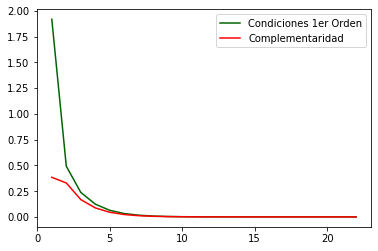

In [3]:
x, y, mu = PI.interior_points(Q, A, c, b, plot=True)

In [4]:
y

array([[9.10838535e-08],
       [5.00000410e-01]])

## Descenso en dos pasos

Problema
Sea $X \in \mathbb{R}^{rxp}$ tal que $X_{ij} ≥0$ para todo par $(i, j)$.

Fijamos $k \in \mathbb{N}$ tal que $k << r$ y $k << p$, considere el siguiente problema:

\begin{array}{c} 
Minimizar ∥X−WH∥^{2}_{F}
\end{array}



<center>Sujeto a</center>
\begin{array}{c}
W_{rxk} ≥ 0 \\
H_{kp} ≥ 0
\end{array} 

### Algoritmo
El problema anterior tiene varios mínimos locales y es un problema no lineal en las variables W y H.
Para encontrar el mínimo local utilizamos el método de descenso en dos pasos que consiste en lo siguiente: 

Para $k=0, 1, 2, ...$ hacer: 

1. Resolver el problema
\begin{array}{c}
Minimizar ∥X−W_{k}H∥^{2}_{F}
\end{array}

<center>Sujeto a</center>
\begin{array}{c}
  H≥ 0
\end{array} 


Una vez que ya se iteró en la matriz $W$, resolvemos el problema de optimización con la matriz $H$. 

2. Resolver el problema
\begin{array}{c} 
Minimizar ∥X−WH_{k+1}∥^{2}_{F}
\end{array}

<center>Sujeto a</center>
\begin{array}{c}
  W≥ 0
\end{array} 

3. Actualizar $k$

4. Regresar al paso 1


#### Notar:

Los problemas que se resuelven en los pasos 1 y 2 son problemas cuadráticos que pueden reescribirse de la siguiente manera: 

De donde el paso (1) son $p$ problemas cuadráticos de la forma: 
\begin{array}{c}
Minimizar ∥X_{*j}−W_{k}H_{*j}∥^{2}_{F}
\end{array}

<center>Sujeto a</center>
\begin{array}{c}
  H_{*j}≥ 0
\end{array} 

<center>para $j=1...p$</center>


Por otra parte, del paso (2) tenemos que son $r$ problemas cuadráticos de la forma:

\begin{array}{c} 
Minimizar ∥X_{i*}−W_{i*}H_{k+1}∥^{2}_{F}
\end{array}

<center>Sujeto a</center>
\begin{array}{c}
  W_{i*}≥ 0
\end{array} 

<center>para $i=1...r$</center>

## Datos de los ratings de peliculas

In [8]:
df_ratings_raw = pd.read_csv("/home/edu/MachineLearning/Final/ratings_small.csv")

In [3]:
df_ratings_raw.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


## Normalizar

In [5]:

maximos=df_ratings_raw.groupby(['userId'])['rating'].max()
minimos=df_ratings_raw.groupby(['userId'])['rating'].min()
intervalos=maximos-minimos

In [6]:
#Los usuarios no utilizan todo el rango de calificaciones de 0 a 5
# Mas bien el rango de calificaciones es de 3.7
intervalos.mean()

3.69150521609538

In [7]:
for i in range(df_ratings_raw.shape[0]):
    user=df_ratings_raw.loc[i, 'userId']
    rating=df_ratings_raw.loc[i, 'rating']
    df_ratings_raw.loc[i, 'rating']=(rating-minimos[user])*5/intervalos[user]

In [9]:
df_ratings = df_ratings_raw.pivot(index='userId',
                                  columns='movieId',
                                  values='rating')

In [9]:
df_ratings.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
X_ratings = df_ratings.to_numpy()

## Sistema de Recomendaciones
El algoritmo creado funcoina a partir de una k, lambda, un maximo de iteraciones y una tolerancia. En sus corridas se puede ir visualizando en que iteracion va y cuales son los costos asociados. 

In [12]:
np.random.seed(42)
k = 2
lambd = .01
maxiter = 3
tol = 1e-3
W, H, tiempo, costo = d2p.gradient2steps(X_ratings, k, lambd, maxiter, tol)


Iteración-0. 
  Costo Medio: 63.242
  Costo de Diferencias: 6323632.285 
  Costo de U: 55.96 
  Costo de V: 753.331 
  Costo Total: 6324441.577 
Han transcurrido 0.165 segundos
En columnas
En renglones 


Iteración-1. 
  Costo Medio: 4.826
  Costo de Diferencias: 482493.673 
  Costo de U: 164.24 
  Costo de V: 0.062 
  Costo Total: 482657.975 
Han transcurrido 42.173 segundos
En columnas
En renglones 


Iteración-2. 
  Costo Medio: 4.485
  Costo de Diferencias: 448360.662 
  Costo de U: 172.585 
  Costo de V: 0.078 
  Costo Total: 448533.324 
Han transcurrido 89.441 segundos
En columnas
En renglones 

Algoritmo de descenso en 2 pasos no convirgió


## Pruebas con Distintas K
### Realizamos corridas con k=[2, 4, 8, 16, 32, 64, 128] y cronometramos el tiempo que tarda la computadora y el costo final obtenido en cada k

In [26]:
lambd = .01
maxiter = 10
tol = 1e-3
K = [2,4,8,16,32,64]

def find_k(K, lambd, maxiter, tol):
    W = []
    H = []
    k_times = []
    k_losses = []
    
    for k in K:
        w, h, time, cost = d2p.gradient2steps(X_ratings, k, lambd, maxiter, tol)
        k_times.append(time)
        k_losses.append(cost)
        
        if k_times[-1] <= min(k_times):
            W = w
            H = h
            
    return W, H, k_times, k_losses

In [1]:
## Correr esta celda tarda horas, se corrio pero se quito su salida pues ocupaba mucho espacio 
# W, H, k_times, k_losses = find_k(K, lambd, maxiter, tol)

In [28]:
# Los resulatdos de las corridas k = 2, 4, 8, 16, 32, 64
k_times

[424.1895833015442,
 481.3911316394806,
 508.646066904068,
 607.7960741519928,
 1056.4972565174103,
 2280.4613585472107]

In [29]:
k_losses

[389655.52034897683,
 362522.61010600533,
 330922.4857260088,
 300681.336973352,
 266119.548611642,
 224984.24247669912]

In [4]:
np.random.seed(42)
k = 128
lambd = .01
maxiter = 10
tol = 1e-3
## Esta es la corrida mas larga de todas
# W, H, tiempo, costo = d2p.gradient2steps(X_ratings, k, lambd, maxiter, tol)

In [12]:
# Como se ve la corrida mas larga tardo mas de una hora
tiempo

3689.809948682785

In [13]:
costo

175360.5195419731

In [31]:
# agregamos el de la corrida con k=128 a las demas corridas
k_times.append(3689.809948682785)
k_losses.append(175360.5195419731)

Text(0.5, 0.98, 'Tiempo vs Costo Total para k= 2, 4, 8, 16, 32, 64, 128')

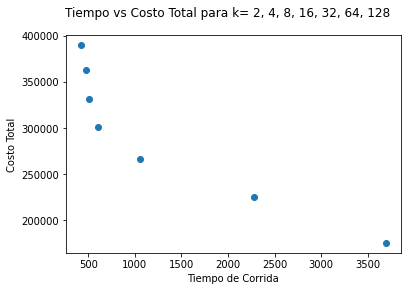

In [32]:
fig,ax=plt.subplots()
ax.scatter(x=k_times, y=k_losses)
ax.set_xlabel('Tiempo de Corrida')
ax.set_ylabel('Costo Total')
fig.suptitle('Tiempo vs Costo Total para k= 2, 4, 8, 16, 32, 64, 128')

## Pruebas con Distintas Lambdas

In [25]:
def find_lambd(k, lambd, maxiter, tol):
    W = []
    H = []
    lambd_losses = []
    
    for l in lambd:
        print(f'\nLambda: {l}')
        w, h, time, cost = d2p.gradient2steps(X_ratings, k, l, maxiter, tol, True)
        
        predicciones=w@h
        predicciones=pd.DataFrame(predicciones, index=df_ratings.index, columns=df_ratings.columns)
        
        #Evaluar con NDCG
        resultados_NDCG=[]
        for i in range(1, 672):
            resultados_NDCG.append(NDCG(df_ratings_raw, predicciones, i))
        lambd_losses.append(np.mean(resultados_NDCG))
        
        if lambd_losses[-1] >= max(lambd_losses):
            W = w
            H = h
            
    return W, H, lambd_losses


In [47]:
np.random.seed(42)
k = 8
lambd = [0, 0.01, 0.2, 0.5, 0.8, 1]
maxiter = 7
tol = 1e-3


In [5]:
## Corridas de las Lambdas igual tardan mucho
# W, H, lambd_losses = find_lambd(k, lambd, maxiter, tol)

In [32]:
# Son los porcentajes obtenidos con el NDCG para cada Lambda
lambd_losses

[0.21683201281730868,
 0.20909846190584228,
 0.2087218124249772,
 0.20107121710764317,
 0.20390504773263146,
 0.2063802714388104]

Text(0.5, 0.98, 'DCGN vs Lambdas')

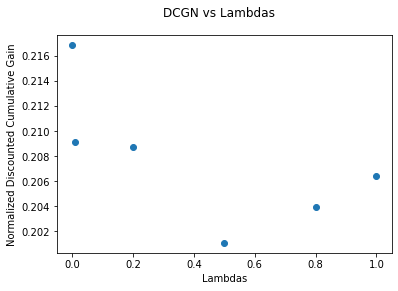

In [49]:
fig,ax=plt.subplots()
ax.scatter(x=lambd, y=lambd_losses)
ax.set_xlabel('Lambdas')
ax.set_ylabel('Normalized Discounted Cumulative Gain')
fig.suptitle('DCGN vs Lambdas')

### Guardamos los datos de la mejor corrida para futuras predicciones

In [14]:
predicciones=W@H
predicciones=pd.DataFrame(predicciones, index=df_ratings.index, columns=df_ratings.columns)

In [15]:
# Guardamos la corrida con k=128 en csv
predicciones.to_csv('predicciones.csv')

In [16]:
U=pd.DataFrame(W)
V=pd.DataFrame(H)

In [17]:
# Igualemente guardamos una copia de las matrices U y V. 
U.to_csv('MatrizU.csv')
V.to_csv('MatrizV.csv')

In [20]:
predicciones.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.017517,0.022307,0.009143,0.002656,0.001792,0.049664,0.013785,0.000018,0.013512,0.032311,...,0.000009,0.000012,0.009183,0.000011,0.000010,0.000029,0.014686,1.367713e-07,4.046535e-07,0.000009
2,0.594510,1.231163,0.096645,0.144181,0.164576,0.298699,0.268347,0.084653,0.101240,1.403738,...,0.000047,0.000059,0.000044,0.000057,0.000056,0.000002,0.000034,6.569296e-03,3.284704e-03,0.000050
3,0.080806,0.188390,0.060430,0.009820,0.052007,0.134592,0.030957,0.013444,0.009095,0.328252,...,0.000026,0.000037,0.000021,0.000032,0.000029,0.000001,0.000016,1.044380e-02,5.221448e-03,0.000025


In [21]:
# En promedio no se predice muy alto
predicciones.mean().mean()

0.06590566284733829

## Metrica de Discounted Cumulative Gain (DCG)
### $DCG_5 = \sum_{i=1}^{5} \frac{rel_i}{log_2(i+1)}$
En este caso usamos $p=5$  para checar la relevancia de 5 recomendaciones.

## Normalized discounted cumulative gain (NDCG) 
### $NDCG_5 = \frac{DCG_5}{IDCG_5}$
Esta normalización utiliza el Ideal Discounted Cumulative Gain que es la calificacion maxima posible, es decir si el top 5 de las recomendaciones son realmente el top 5.   

In [22]:
# Calcula el NDCG para el top p datos, el default es p=5
# Recibe las predicciones como un dataframe con indices los Id de usuarios y columnas el Id de las peliculas
def NDCG(raw_data, predicciones, userId, p=5):
    top_real = raw_data[raw_data.userId==userId].sort_values('rating', ascending=False).head(p)
    peliculas_real=top_real['movieId']
    ratings_real=top_real['rating']
    dcg=0
    idcg=0
    
    for i in range(p):
        dcg+=predicciones.loc[userId, peliculas_real.iloc[i]]/np.log2(i+2)
        idcg+=ratings_real.iloc[i]/np.log2(i+2)
    
    return dcg/idcg
    

In [23]:
# Para obtener el NDCG utilizamos la funcion en todos los usuarios  
resultados_NDCG=[]
for i in range(1, 672):
    resultados_NDCG.append(NDCG(df_ratings_raw, predicciones, i))

### Promedio de NDCG para todos los usuarios utilizando k=128:

In [24]:
np.mean(resultados_NDCG)
# El ideal hubiera sido 1.00

0.44718765280059625

## Recomendaciones de películas para usuarios

Recordamos que las matrices U y V se obtuvieron al correr el método de *Descenso2Pasos* con los parámetros $k=128$, $\lambda = 0.01$, y se guardaron los resulatdos en  MatrizU.csv,  MatrizV.csv y en  predicciones.csv que es la multiplicación de ambas. 

In [64]:
#Import other DataFrames to recommend movies
df_ratings_raw = pd.read_csv("ratings_small.csv",low_memory=False)
df_metadata = pd.read_csv("movies_metadata.csv",low_memory=False)
df_links = pd.read_csv("links_small.csv",low_memory=False)
df_ratings = df_ratings_raw.pivot(index='userId', columns='movieId', values='rating')

In [65]:
# Recuperamos la matriz de predicciones hechas con k=128
recomendaciones = pd.read_csv("predicciones.csv")

In [66]:
# Arreglamos el hecho de que el indice se volvio una columna al guardarlo en csv
# Recuperando el indice original
recomendaciones.index = recomendaciones.userId
# y borrando la columna extra
recomendaciones = recomendaciones.drop(columns=['userId'])
# Las columnas se sacan de la matriz original de ratings
recomendaciones.columns=df_ratings.columns

In [67]:
recomendaciones.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.017517,0.022307,0.009143,0.002656,0.001792,0.049664,0.013785,0.000018,0.013512,0.032311,...,0.000009,0.000012,0.009183,0.000011,0.000010,0.000029,0.014686,1.367713e-07,4.046535e-07,0.000009
2,0.594510,1.231163,0.096645,0.144181,0.164576,0.298699,0.268347,0.084653,0.101240,1.403738,...,0.000047,0.000059,0.000044,0.000057,0.000056,0.000002,0.000034,6.569296e-03,3.284704e-03,0.000050
3,0.080806,0.188390,0.060430,0.009820,0.052007,0.134592,0.030957,0.013444,0.009095,0.328252,...,0.000026,0.000037,0.000021,0.000032,0.000029,0.000001,0.000016,1.044380e-02,5.221448e-03,0.000025


In [68]:
#Merge df_links and df_metadata to get Movie Title
df_metadata['imdb_id'] = df_metadata['imdb_id'].dropna().str.replace('tt','').astype(str).astype(int)
df_merged_metadata = pd.merge(df_metadata, df_links, left_on='imdb_id', right_on = 'imdbId', how='inner')
df_merged_metadata.rename(columns = {'original_title':'Movie Title'}, inplace = True) 

In [69]:
df_merged_metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,Movie Title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,imdbId,tmdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,114709,862.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497.0,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,113497,8844.0


### Hacer recomendaciones

In [70]:
# El top 5 de recomendaciones para un usuario, son las calificadas mas altas
usuario=8

top_movies = recomendaciones.loc[usuario].sort_values(ascending=False).head().index
df_merged_metadata.loc[df_merged_metadata['movieId'].isin(top_movies)][['Movie Title']]

,Movie Title
48,The Usual Suspects
284,The Shawshank Redemption
472,Schindler's List
2059,The Matrix
2369,Fight Club


In [71]:
#Este es el top 5 de peliculas recomendadas tomando en cuenta solo las que aun no ha calificado 
usuario=8

ya_vistas = df_ratings_raw[df_ratings_raw.userId==usuario]['movieId']
top_unseen = recomendaciones.loc[usuario].drop(ya_vistas).sort_values(ascending=False).head().index
df_merged_metadata.loc[df_merged_metadata['movieId'].isin(top_unseen)][['Movie Title']]

,Movie Title
427,Jurassic Park
640,Trainspotting
1527,The Breakfast Club
4076,Spider-Man
4682,Pirates of the Caribbean: The Curse of the Bla...
